## Задание 2, Оксана Рудковская

Дан объём ЗП исходя из стажа сотрудника, необходимо спрогнозировать ЗП при стаже 5 лет.

In [1]:
import pandas as pd
import pylab
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("Задание прогноз.xlsx", sheet_name = 'Задание_2', usecols = "A:B")

In [3]:
df

,Стаж,ЗП
0,0.0,14.41
1,0.3,12.24
2,0.5,14.43
3,0.8,14.88
4,1.1,16.29
5,1.3,20.20
6,1.6,19.04
7,1.8,23.50
8,2.1,23.35
9,2.4,24.61


In [4]:
x = df[~df['ЗП'].isna()]
del x['ЗП']
y = df[~df['ЗП'].isna()]['ЗП']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
X_train.sort_index(inplace=True)
y_train.sort_index(inplace=True)

###  Построим график зависимостей стажа работы и заработной платы сотрудников

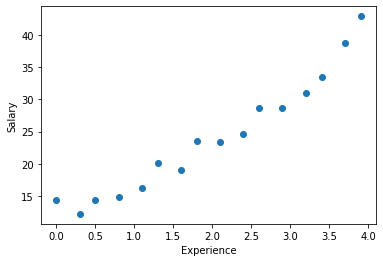

In [8]:
pylab.plot(x, y, 'o')
pylab.xlabel('Experience')
pylab.ylabel('Salary')
pylab.show()

На графике заметна сильная корреляция между показателями

### Построим модель линейной регрессии

In [9]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_predict = lr.predict(X_train)

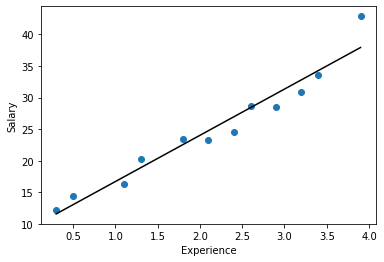

In [11]:
pylab.plot(X_train, y_train, 'o')
pylab.plot(X_train, y_predict, 'k-')
pylab.xlabel('Experience')
pylab.ylabel('Salary')
pylab.show()

In [12]:
lr.score(X_test, y_test)

0.9117587774510816

Модель неплохо справилась, но видно, что значения в середине по большей части расположены ниже графика, а на концах выше.
Могу предположить, что полиномиальная модель регрессии лучше опишет зависимость

### Построим модель полиномиальной регрессии

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
lr_pol_reg = LinearRegression()
lr_pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_predict_polinom = lr_pol_reg.predict(poly_reg.fit_transform(X_train))

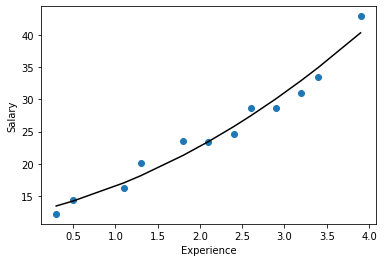

In [16]:
pylab.plot(X_train, y_train, 'o')
pylab.plot(X_train, y_predict_polinom, 'k-')
pylab.xlabel('Experience')
pylab.ylabel('Salary')
pylab.show()

In [17]:
lr_pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.9860140295207375

In [18]:
lr_pol_reg.predict(poly_reg.fit_transform([[5]]))

array([54.00396725])

### При стаже в 5 лет у сотрудника будет ЗП равная 54 у.е